In [ ]:
! pip install numpy

In [2]:
! pip install pandas

     |████████████████████████████████| 9.5 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 7.3 MB/s eta 0:00:01
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)


In [40]:
!pip install ipython --upgrade 

Cache entry deserialization failed, entry ignored
Requirement already up-to-date: ipython in /home/luis/comp_4447/p_env/lib/python3.6/site-packages
Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 358kB 1.2MB/s ta 0:00:011
Requirement already up-to-date: jedi>=0.10 in /home/luis/comp_4447/p_env/lib/python3.6/site-packages (from ipython)
Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 788kB 748kB/s ta 0:00:011
Requirement already up-to-date: backcall in /home/luis/comp_4447/p_env/lib/python3.6/site-packages (from ipython)
Cache entry deserialization failed, entry ignored
Requirement already up-to-date: pickleshare in /home/luis/comp_4447/p_env/lib/python3.6/site-packages (from ipython)
Cache entry deserialization failed, entry ignored
Requirement already up-to-date: decorator in /home/luis/comp_4447/p_env/lib/python3.6/site-packages (from ipython)
Cache entry deserialization failed, entry ignored


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
imdb_movies = pd.read_csv('IMDb movies.csv')
imdb_movies.head()

/home/luis/comp_4447/p_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [3]:
imdb_ratings = pd.read_csv('IMDb ratings.csv')
imdb_ratings.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [4]:
movies = pd.merge(imdb_movies, imdb_ratings, on = 'imdb_title_id')

In [5]:
movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [32]:
movies_usa = movies[movies['country'] == 'USA']
movies_usa.sample(10)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
37578,tt0236124,Country Blue,Country Blue,1973,1975-02-01,"Adventure, Crime, Drama",98,USA,English,Jack Conrad,"Jack Conrad, William F. Conrad",Millstone Productions,"Dub Taylor, Jack Conrad, Rita George, Mildred ...","A story based in the south and has poverty, an...",3.7,162,$ 180000,NaN,NaN,NaN,12.0,5.0,3.7,162,4.0,4.0,7,2,6,5,16,19,34,25,24,24,NaN,NaN,5.0,4.0,4.2,56.0,3.4,84.0,3.8,132.0,NaN,NaN,5.0,4.0,4.2,51.0,3.5,76.0,3.2,10.0,NaN,NaN,NaN,NaN,4.7,3.0,2.4,7.0,2.8,22.0,3.5,79.0,3.9,52.0
18276,tt0076913,Which Way Is Up?,Which Way Is Up?,1977,1978-06-23,Comedy,94,USA,English,Michael Schultz,"Lina Wertmüller, Carl Gottlieb",Universal Pictures,"Richard Pryor, Lonette McKee, Margaret Avery, ...",Richard Pryor is playing three different roles...,6.4,1489,$ 3200000,NaN,NaN,NaN,14.0,18.0,6.4,1489,6.8,7.0,240,94,200,283,307,176,81,43,31,34,NaN,NaN,5.6,39.0,6.3,418.0,6.3,660.0,6.2,982.0,NaN,NaN,5.4,31.0,6.2,350.0,6.3,543.0,6.9,189.0,NaN,NaN,7.0,8.0,7.2,62.0,6.8,112.0,5.7,96.0,6.5,798.0,5.8,219.0
59507,tt1569933,Clownstrophobia,Clownstrophobia,2009,2009-06-06,Horror,78,USA,English,Geraldine Winters,Geraldine Winters,DGW Films,"Ebru Yonak, Bobby Max, Michelle Romano, Amanda...",A psychologist hosts a group therapy session f...,2.0,189,$ 500000,NaN,NaN,NaN,5.0,4.0,2.0,189,3.1,2.0,27,0,1,1,1,6,11,19,39,84,NaN,NaN,1.7,29.0,2.0,83.0,2.5,62.0,2.0,138.0,NaN,NaN,1.8,15.0,2.0,73.0,2.2,49.0,2.1,31.0,NaN,NaN,1.5,11.0,2.6,10.0,3.3,10.0,2.0,10.0,2.4,60.0,1.8,103.0
58744,tt1502714,Monogamy,Monogamy,2010,2010-04-24,"Drama, Romance",96,USA,English,Dana Adam Shapiro,"Dana Adam Shapiro, Evan M. Wiener",TBD,"Chris Messina, Rashida Jones, Meital Dohan, Za...",The strained relationship of an engaged Brookl...,5.0,728,$ 5000000,$ 21527,$ 21527,47.0,14.0,33.0,5.0,728,5.4,5.0,61,23,50,79,129,143,102,56,36,49,NaN,NaN,4.9,51.0,5.1,361.0,4.8,224.0,4.9,441.0,NaN,NaN,4.7,29.0,4.9,234.0,4.9,165.0,5.4,204.0,NaN,NaN,5.2,21.0,5.5,119.0,5.0,54.0,4.7,29.0,5.0,319.0,5.1,254.0
977,tt0021371,Show Girl in Hollywood,Show Girl in Hollywood,1930,1930-04-20,"Comedy, Musical, Drama",80,USA,English,Mervyn LeRoy,"J.P. McEvoy, Harvey F. Thew",First National Pictures,"Alice White, Jack Mulhall, Blanche Sweet, Ford...",'Rainbow Girls' has just opened and closed on ...,6.4,238,NaN,NaN,NaN,NaN,13.0,10.0,6.4,238,6.9,7.0,51,6,29,48,51,29,9,5,0,10,NaN,NaN,6.2,8.0,6.5,42.0,6.4,136.0,6.2,152.0,NaN,NaN,5.3,3.0,6.3,29.0,6.3,117.0,6.7,35.0,NaN,NaN,6.7,5.0,7.1,11.0,6.6,18.0,5.4,38.0,6.6,135.0,5.5,37.0
68244,tt2657152,War Z Day One,War Z Day One,2013,2013-02-20,"Horror, Sci-Fi, Thriller",58,USA,English,Lana Titov,"Lana Titov, Michael G. Welch",Hammerpoint Interactive,"Josh Butcher, Annakate Chappell, Mark Conlon, ...",Peter is obsessed with apocalypses. He reads a...,5.5,118,$ 60000,NaN,NaN,NaN,8.0,1.0,5.5,118,7.2,9.0,35,25,26,0,1,3,3,3,1,21,NaN,NaN,5.6,11.0,4.5,54.0,6.5,35.0,5.4,95.0,NaN,NaN,5.6,11.

In [33]:
pd.options.display.max_rows = 999
print(str(movies_usa.isna().sum()))

imdb_title_id                    0
title                            0
original_title                   0
year                             0
date_published                   0
genre                            0
duration                         0
country                          0
language                       345
director                        34
writer                         201
production_company            1160
actors                          26
description                     74
avg_vote                         0
votes                            0
budget                       18023
usa_gross_income             20947
worlwide_gross_income        20808
metascore                    21902
reviews_from_users             305
reviews_from_critics          1876
weighted_average_vote            0
total_votes                      0
mean_vote                        0
median_vote                      0
votes_10                         0
votes_9                          0
votes_8             

In [34]:
movies_usa.shape

(28511, 70)

In [35]:
select =  ['imdb_title_id',
           'title',
           'original_title',
           'year',
           'genre',
           'director',
           'avg_vote',
           'votes',
           'budget',
           'males_allages_avg_vote',
           'males_allages_votes',
           'females_allages_avg_vote',
           'females_allages_votes']

movies_usa = movies_usa[select]

In [36]:
movies_usa.head()

,imdb_title_id,title,original_title,year,genre,director,avg_vote,votes,budget,males_allages_avg_vote,males_allages_votes,females_allages_avg_vote,females_allages_votes
0,tt0000009,Miss Jerry,Miss Jerry,1894,Romance,Alexander Black,5.9,154,NaN,6.2,97.0,6.0,35.0
3,tt0002101,Cleopatra,Cleopatra,1912,"Drama, History",Charles L. Gaskill,5.2,446,$ 45000,5.1,299.0,5.9,39.0
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,"Biography, Drama",Sidney Olcott,5.7,484,NaN,5.7,354.0,5.8,31.0
17,tt0003167,Amore di madre,"Home, Sweet Home",1914,Drama,D.W. Griffith,5.8,187,NaN,5.7,124.0,6.4,16.0
19,tt0003471,Traffic in Souls,Traffic in Souls,1913,"Crime, Drama",George Loane Tucker,6.0,552,$ 5700,5.9,399.0,6.5,54.0


In [37]:
pd.options.display.max_columns = 999
cleaned = movies_usa.genre.str.split(",", expand=True).stack()
pd.get_dummies(cleaned).groupby(level=0).sum()
movies_usa["genre"] = movies_usa.genre.apply(lambda x: x.replace(" ", ""))
movies_usa = pd.concat([movies_usa, movies_usa["genre"].str.get_dummies(',')], axis = 1)
movies_usa.head()

,imdb_title_id,title,original_title,year,genre,director,avg_vote,votes,budget,males_allages_avg_vote,males_allages_votes,females_allages_avg_vote,females_allages_votes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0000009,Miss Jerry,Miss Jerry,1894,Romance,Alexander Black,5.9,154,NaN,6.2,97.0,6.0,35.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,tt0002101,Cleopatra,Cleopatra,1912,"Drama,History",Charles L. Gaskill,5.2,446,$ 45000,5.1,299.0,5.9,39.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,"Biography,Drama",Sidney Olcott,5.7,484,NaN,5.7,354.0,5.8,31.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,tt0003167,Amore di madre,"Home, Sweet Home",1914,Drama,D.W. Griffith,5.8,187,NaN,5.7,124.0,6.4,16.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,tt0003471,Traffic in Souls,Traffic in Souls,1913,"Crime,Drama",George Loane Tucker,6.0,552,$ 5700,5.9,399.0,6.5,54.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
small = movies_usa.iloc[:,12:]

In [38]:
#looking at avg rating per genre
sum_per_genre = (
    movies_usa.assign(genres=movies_usa["genre"].str.split(", "))
)
sep = '*'

df = avg_per_genre.genres.apply(sep.join).str.get_dummies(sep=sep).multiply(avg_per_genre.avg_vote, axis=0).sum().index
df

Index([' Action', ' Adventure', ' Animation', ' Biography', ' Comedy',
       ' Crime', ' Drama', ' Family', ' Fantasy', ' Film-Noir', ' History',
       ' Horror', ' Music', ' Musical', ' Mystery', ' News', ' Reality-TV',
       ' Romance', ' Sci-Fi', ' Sport', ' Thriller', ' War', ' Western',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [14]:
pd.__version__

'0.25.0'

In [63]:
avg_per_genre = (
    movies_usa.assign(genres=movies_usa["genre"].str.split(","))
    .explode("genres")
    .groupby("genres", as_index=False)["avg_vote"].mean()
)
count_per_genre = (
    movies_usa.assign(genres=movies_usa["genre"].str.split(","))
    .explode("genres")
    .groupby("genres", as_index=False)["title"].count()
)
metrics_per_genre = pd.concat([avg_per_genre, count_per_genre["title"]], axis = 1)
metrics_per_genre = metrics_per_genre[metrics_per_genre["title"] != 1]
metrics_per_genre.rename({"title":"count"}, axis = 1, inplace = True)
metrics_per_genre

,genres,avg_vote,count
0,Action,5.250176,4273
1,Adventure,5.711773,2854
2,Animation,6.256481,432
3,Biography,6.544744,704
4,Comedy,5.680094,9972
5,Crime,5.810991,4267
7,Drama,5.930578,13827
8,Family,5.658366,1285
9,Fantasy,5.345362,1175
10,Film-Noir,6.642968,647


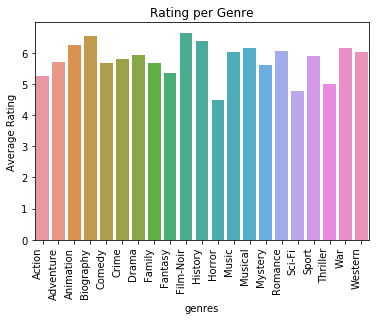

In [114]:
g = sns.barplot(data=metrics_per_genre, x= "genres", y = "avg_vote")
g.set_xticklabels(g.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
g.set_ylabel("Average Rating")
g.set_title("Rating per Genre");

In [89]:
avg_per_director = (
    movies_usa.assign(directors=movies_usa["director"].str.split(","))
    .explode("directors")
    .groupby("directors", as_index=False)["avg_vote"].mean()
)
count_per_director = (
    movies_usa.assign(directors=movies_usa["director"].str.split(","))
    .explode("directors")
    .groupby("directors", as_index=False)["title"].count()
)

metrics_dir = pd.concat([avg_per_director, count_per_director["title"]], axis = 1)
#metrics_dir = metrics_per_genre[metrics_per_genre["title"] != 1]
metrics_dir.rename({"title":"count"}, axis = 1, inplace = True)
metrics_dir = metrics_dir.sort_values("avg_vote", axis = 0, ascending=False)
metrics_dir = metrics_dir[metrics_dir["count"] >= 5]
metrics_dir

,directors,avg_vote,count
10339,Quentin Tarantino,7.811111,9
3179,Charles Chaplin,7.666667,15
4075,David Fincher,7.625000,8
2580,Billy Wilder,7.580952,21
670,Joe Russo,7.580000,5
2201,Anthony Russo,7.580000,5
4486,Don Tjernagel,7.560000,5
8769,Martin Scorsese,7.544444,18
1868,Alfred Hitchcock,7.530769,26
10065,Paul Thomas Anderson,7.500000,7


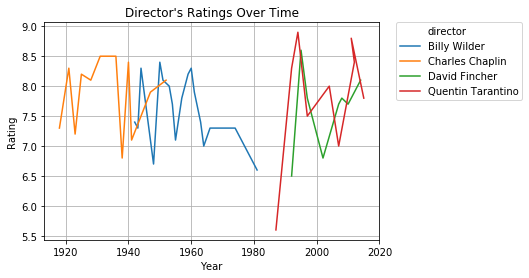

In [110]:
top5 = metrics_dir["directors"].values.tolist()
top5 = top5[0:4] 
movies_small = movies_usa[movies_usa["director"].isin(top5)]

table = pd.pivot_table(movies_small, index = ["director", "year"], values = ["avg_vote"])
g = sns.lineplot(data=table.reset_index(), x = "year", y = "avg_vote", hue = "director")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
g.set(xlabel='Year', ylabel='Rating')
g.set_title("Director's Ratings Over Time");

In [86]:
df = movies_usa[movies_usa["director"] == "Christopher Nolan"]
movies_usa["director"].str.contains("Christopher Nolan").values.tolist().count(True)

1